In [3]:
import warnings
warnings.simplefilter("ignore")
import logging
logging.getLogger('moviepy').setLevel(logging.WARNING)

#  Proyecto.<font color='#773BEE'>  Atención visual y estrés auditivo.    </font>
## Detección de puntos de atención visual influenciados por afección auditiva

####  <font color=' #413BEE'> Realizado por: Ixchel Dafne Avendaño Pacheco  </font>



Este documento presenta la metodología empleada para llevar a cabo un estudio que investiga el impacto del estrés auditivo en la atención visual y la retención de información visual. El experimento diseñado implicó la presentación de diferentes láminas, todas compuestas por 4 columnas y 2 filas.


Después de que los sujetos visualizaron todas las láminas, se administró una encuesta para indagar sobre las imágenes recordadas y los colores presentes en las láminas. El procesamiento de datos incluyó la segmentación de videos por los puntos de atención designados.


Adicionalmente, se extrajeron landmarks de los ojos de los participantes para construir un dataframe. Este dataframe se utilizó para entrenar y evaluar ocho clasificadores diferentes, entre los cuales destacaron Random Forest con una precisión de 0.861 y Árboles de Decisión con una precisión de 0.805. Asimismo, se implementaron dos metamodelos utilizando la técnica de stacking, aunque se observó que el rendimiento de estos fue ligeramente inferior al utilizar solo los clasificadores, obteniendo una precisión del 0.859.

En este Notebook se encuentran:

1. Segmentación de videos.
2. Extracción de características de los ojos.
3. Construcción del dataframe.
4. Utilización de ocho clasificadores diferentes.
5. Implementación de dos metamodelos utilizando la técnica de stacking.
6. Reducción de dimensionalidad 

# 1 <font color='#413BEE'> Segmentación de Videos</font> 

## 1.1 <font color='#413BEE'> Segmentación de Videos sujetos con estímulo auditivo</font> 

In [2]:
import os
import pandas as pd
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

def time_to_seconds(time_str):
    if time_str is None or pd.isna(time_str):
        return None
    times = time_str.split('-')
    result = []
    for t in times:
        parts = t.strip().split(':')
        result.append(int(parts[0]) * 60 + int(parts[1]))
    return result

def ensure_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def read_intervals(csv_file_path):
    df = pd.read_csv(csv_file_path)
    # Ignorar columnas no deseadas, como índices no nombrados
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    intervals = df.to_dict(orient='list')
    for key in intervals.keys():
        intervals[key] = [None if x is None or x == 'None' else x for x in intervals[key]]
    return intervals

def process_videos(videos_directory, csv_file_path, output_directory):
    intervals = read_intervals(csv_file_path)
    ensure_dir(output_directory)
    video_files = [f for f in os.listdir(videos_directory) if f.endswith(('.MP4', '.mp4'))]
    for video_file in video_files:
        video_path = os.path.join(videos_directory, video_file)
        for category, times in intervals.items():
            category_dir = os.path.join(output_directory, category)
            ensure_dir(category_dir)
            for i, time_range in enumerate(times):
                if time_range:
                    start_end = time_to_seconds(time_range)
                    if start_end:
                        start, end = start_end
                        output_path = os.path.join(category_dir, f'{os.path.splitext(video_file)[0]}_{category}_segment_{i+1}.mp4')
                        ffmpeg_extract_subclip(video_path, start, end, targetname=output_path)

videos_directory = 'VIDEOS/NOR'
csv_file_path = 'PAV.csv'
output_directory = 'VIDEOS_SEG_N'

process_videos(videos_directory, csv_file_path, output_directory)


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

## 1.2 <font color='#413BEE'> Segmentación de Videos sujetos sin estímulo auditivo</font> 

In [3]:
import os
import pandas as pd
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

def time_to_seconds(time_str):
    if time_str is None or pd.isna(time_str):
        return None
    times = time_str.split('-')
    result = []
    for t in times:
        parts = t.strip().split(':')
        result.append(int(parts[0]) * 60 + int(parts[1]))
    return result

def ensure_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def read_intervals(csv_file_path):
    df = pd.read_csv(csv_file_path)
    # Ignorar columnas no deseadas, como índices no nombrados
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    intervals = df.to_dict(orient='list')
    for key in intervals.keys():
        intervals[key] = [None if x is None or x == 'None' else x for x in intervals[key]]
    return intervals

def process_videos(videos_directory, csv_file_path, output_directory):
    intervals = read_intervals(csv_file_path)
    ensure_dir(output_directory)
    video_files = [f for f in os.listdir(videos_directory) if f.endswith(('.MP4', '.mp4'))]
    for video_file in video_files:
        video_path = os.path.join(videos_directory, video_file)
        for category, times in intervals.items():
            category_dir = os.path.join(output_directory, category)
            ensure_dir(category_dir)
            for i, time_range in enumerate(times):
                if time_range:
                    start_end = time_to_seconds(time_range)
                    if start_end:
                        start, end = start_end
                        output_path = os.path.join(category_dir, f'{os.path.splitext(video_file)[0]}_{category}_segment_{i+1}.mp4')
                        ffmpeg_extract_subclip(video_path, start, end, targetname=output_path)

videos_directory = 'VIDEOS/EST'
csv_file_path = 'PAV.csv'
output_directory = 'VIDEOS_SEG_E'

process_videos(videos_directory, csv_file_path, output_directory)


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

# 2 <font color='#413BEE'> Extracción de Características </font> 

In [4]:
import cv2
import dlib
import os
import pandas as pd

## 2.1  <font color='#413BEE'> Extracción de Características sujetos con estímulo auditivo </font> 

### 2.1.1 <font color='#413BEE'> Inferior derecha  </font> 

En esta sección, se realiza la extracción de características para la clase inferior derecha, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [5]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "INFDER"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_N/INFDER'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_N/INFDER\s10_INFDER_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s10_INFDER_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s10_INFDER_segment_3.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s11_INFDER_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s11_INFDER_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s11_INFDER_segment_3.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s12_INFDER_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s12_INFDER_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s12_INFDER_segment_3.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s1_INFDER_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s1_INFDER_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s1_INFDER_segment_3.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s2_INFDER_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s2_INFDER_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s2_INFDER_segment_3.mp4
Procesando video: VIDEOS_SEG_N/INFDER\s3_INFDER_segment_1.mp4

### 2.1.2 <font color='#413BEE'> Inferior izquierda  </font> 

En esta sección, se realiza la extracción de características para la clase inferior izquierda, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [6]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "INFIZQ"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_N/INFIZQ'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_N/INFIZQ\s10_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s10_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s11_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s11_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s12_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s12_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s1_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s1_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s2_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s2_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s3_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s3_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s4_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s4_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s5_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZQ\s5_INFIZQ_segment_2.mp4
Pr

### 2.1.3 <font color='#413BEE'> Superior derecha  </font> 

En esta sección, se realiza la extracción de características para la clase Superior derecha, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [5]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "SUPDER"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_N/SUPDER'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_N/SUPDER\s10_SUPDER_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s10_SUPDER_segment_2.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s10_SUPDER_segment_3.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s10_SUPDER_segment_4.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s11_SUPDER_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s11_SUPDER_segment_2.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s11_SUPDER_segment_3.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s11_SUPDER_segment_4.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s12_SUPDER_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s12_SUPDER_segment_2.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s12_SUPDER_segment_3.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s12_SUPDER_segment_4.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s1_SUPDER_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s1_SUPDER_segment_2.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s1_SUPDER_segment_3.mp4
Procesando video: VIDEOS_SEG_N/SUPDER\s1_SUPDER_segment_4.

###  2.1.4 <font color='#413BEE'> Superior izquierda  </font> 

En esta sección, se realiza la extracción de características para la clase Superior izquierda, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [6]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "SUPIZQ"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_N/SUPIZQ'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_N/SUPIZQ\s10_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s10_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s11_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s11_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s12_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s12_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s1_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s1_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s2_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s2_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s3_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s3_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s4_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s4_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s5_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPIZQ\s5_SUPIZQ_segment_2.mp4
Pr

### 2.1.5 <font color='#413BEE'> Inferior derecha desplazado </font> 

En esta sección, se realiza la extracción de características para la clase inferior derecha desplazado, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [7]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "INFDRA"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_N/INFDRA'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_N/INFDRA\s10_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDRA\s11_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDRA\s12_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDRA\s1_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDRA\s2_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDRA\s3_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDRA\s4_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDRA\s5_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDRA\s6_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDRA\s7_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDRA\s8_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFDRA\s9_INFDRA_segment_1.mp4


### 2.1.6 <font color='#413BEE'> Inferior izquierda desplazado  </font> 

En esta sección, se realiza la extracción de características para la clase inferior izquierda desplazado, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [8]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "INFIZA"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_N/INFIZA'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_N/INFIZA\s10_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZA\s11_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZA\s12_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZA\s1_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZA\s2_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZA\s3_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZA\s4_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZA\s5_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZA\s6_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZA\s7_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZA\s8_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/INFIZA\s9_INFIZA_segment_1.mp4


###  2.1.7 <font color='#413BEE'> Superior derecha desplazado </font> 

En esta sección, se realiza la extracción de características para la clase Superior derecha desplazado, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [9]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "SUPDRA"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_N/SUPDRA'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_N/SUPDRA\s10_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDRA\s11_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDRA\s12_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDRA\s1_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDRA\s2_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDRA\s3_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDRA\s4_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDRA\s5_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDRA\s6_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDRA\s7_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDRA\s8_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_N/SUPDRA\s9_SUPDRA_segment_1.mp4


## 2.2  <font color='#413BEE'> Extracción de Características sujetos sin estímulo auditivo </font> 

### 2.2.1 <font color='#413BEE'> Inferior derecha  </font> 

En esta sección, se realiza la extracción de características para la clase inferior derecha, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [10]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "INFDER"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_E/INFDER'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_E/INFDER\s13_INFDER_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s13_INFDER_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s13_INFDER_segment_3.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s14_INFDER_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s14_INFDER_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s14_INFDER_segment_3.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s15_INFDER_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s15_INFDER_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s15_INFDER_segment_3.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s16_INFDER_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s16_INFDER_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s16_INFDER_segment_3.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s17_INFDER_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s17_INFDER_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s17_INFDER_segment_3.mp4
Procesando video: VIDEOS_SEG_E/INFDER\s18_INFDER_segmen

### 2.2.2 <font color='#413BEE'> Inferior izquierda  </font> 

En esta sección, se realiza la extracción de características para la clase inferior izquierda, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [11]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "INFIZQ"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_E/INFIZQ'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_E/INFIZQ\s13_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s13_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s14_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s14_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s15_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s15_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s16_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s16_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s17_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s17_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s18_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s18_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s19_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s19_INFIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s20_INFIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZQ\s20_INFIZQ_segmen

### 2.2.3 <font color='#413BEE'> Superior derecha  </font> 

En esta sección, se realiza la extracción de características para la clase Superior derecha, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [12]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "SUPDER"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_E/SUPDER'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_E/SUPDER\s13_SUPDER_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s13_SUPDER_segment_2.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s13_SUPDER_segment_3.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s13_SUPDER_segment_4.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s14_SUPDER_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s14_SUPDER_segment_2.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s14_SUPDER_segment_3.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s14_SUPDER_segment_4.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s15_SUPDER_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s15_SUPDER_segment_2.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s15_SUPDER_segment_3.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s15_SUPDER_segment_4.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s16_SUPDER_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s16_SUPDER_segment_2.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s16_SUPDER_segment_3.mp4
Procesando video: VIDEOS_SEG_E/SUPDER\s16_SUPDER_segmen

### 2.2.4 <font color='#413BEE'> Superior izquierda  </font> 

En esta sección, se realiza la extracción de características para la clase Superior izquierda, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [13]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "SUPIZQ"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_E/SUPIZQ'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_E/SUPIZQ\s13_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s13_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s14_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s14_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s15_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s15_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s16_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s16_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s17_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s17_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s18_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s18_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s19_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s19_SUPIZQ_segment_2.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s20_SUPIZQ_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPIZQ\s20_SUPIZQ_segmen

### 2.2.5 <font color='#413BEE'> Inferior derecha desplazado </font> 

En esta sección, se realiza la extracción de características para la clase inferior derecha desplazado, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [14]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "INFDRA"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_E/INFDRA'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_E/INFDRA\s13_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDRA\s14_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDRA\s15_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDRA\s16_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDRA\s17_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDRA\s18_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDRA\s19_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDRA\s20_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDRA\s21_INFDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFDRA\s22_INFDRA_segment_1.mp4


### 2.2.6 <font color='#413BEE'> Inferior izquierda desplazado  </font> 

En esta sección, se realiza la extracción de características para la clase inferior izquierda desplazado, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [15]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "INFIZA"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_E/INFIZA'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_E/INFIZA\s13_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZA\s14_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZA\s15_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZA\s16_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZA\s17_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZA\s18_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZA\s19_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZA\s20_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZA\s21_INFIZA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/INFIZA\s22_INFIZA_segment_1.mp4


### 2.2.7 <font color='#413BEE'> Superior derecha desplazado </font> 

En esta sección, se realiza la extracción de características para la clase Superior derecha desplazado, con el objetivo de generar un archivo CSV que almacene la información de los landmarks relevantes de dicha clase. 

In [16]:
# Inicializa el detector de rostros de dlib y el predictor de puntos de referencia
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_eye_landmarks(video_path):
    cap = cv2.VideoCapture(video_path)
    all_eye_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            landmarks = predictor(gray, face)
            # Recolectar los landmarks de los ojos para cada cara detectada
            eye_landmarks = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 48)]
            all_eye_landmarks.append(eye_landmarks)

    cap.release()
    cv2.destroyAllWindows()
    return all_eye_landmarks

def process_videos_in_directory(directory):
    eye_landmarks_data = []

    for file in os.listdir(directory):
        if file.endswith(('.MP4', '.mp4')):
            video_path = os.path.join(directory, file)
            print(f"Procesando video: {video_path}")
            eye_landmarks = get_eye_landmarks(video_path)
            
            # Extraer y organizar cada punto de referencia del ojo en su propia columna
            for landmarks in eye_landmarks:
                eye_data = {"Video": os.path.basename(video_path)}
                for i, (x, y) in enumerate(landmarks):
                    eye_data[f'Eye_{i+1}_X'] = x
                    eye_data[f'Eye_{i+1}_Y'] = y
                eye_data["Clase"] = "SUPDRA"  # Columna vacía para anotar la clase manualmente
                eye_landmarks_data.append(eye_data)

    return pd.DataFrame(eye_landmarks_data)

# Especifica la subcarpeta para la clase 
directory = 'VIDEOS_SEG_E/SUPDRA'
results_df = process_videos_in_directory(directory)

# Guardar los resultados en un archivo CSV en la misma carpeta
csv_path = os.path.join(directory, 'eye_landmarks_results.csv')
results_df.to_csv(csv_path, index=False)


Procesando video: VIDEOS_SEG_E/SUPDRA\s13_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDRA\s14_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDRA\s15_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDRA\s16_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDRA\s17_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDRA\s18_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDRA\s19_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDRA\s20_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDRA\s21_SUPDRA_segment_1.mp4
Procesando video: VIDEOS_SEG_E/SUPDRA\s22_SUPDRA_segment_1.mp4


# 3. <font color='#413BEE'> Construcción del Dataframe </font> 

##  3.1 <font color='#413BEE'> Construcción del Dataframe con estímulo auditivo</font> 

Convertimos los archivos .csv en dataframes 

In [17]:
dfINFDER1 = pd.read_csv("VIDEOS_SEG_N/INFDER/eye_landmarks_results.csv")
dfINFDRA1 = pd.read_csv("VIDEOS_SEG_N/INFDRA/eye_landmarks_results.csv")
dfINFIZQ1 = pd.read_csv("VIDEOS_SEG_N/INFIZQ/eye_landmarks_results.csv")
dfINFIZA1 = pd.read_csv("VIDEOS_SEG_N/INFIZA/eye_landmarks_results.csv")
dfSUPDER1 = pd.read_csv("VIDEOS_SEG_N/SUPDER/eye_landmarks_results.csv")
dfSUPDRA1 = pd.read_csv("VIDEOS_SEG_N/SUPDRA/eye_landmarks_results.csv")
dfSUPIZQ1 = pd.read_csv("VIDEOS_SEG_N/SUPIZQ/eye_landmarks_results.csv")

Unimos todos los DataFrames

In [18]:
df1 = pd.concat([dfINFDER1, dfINFDRA1, dfINFIZQ1, dfINFIZA1, dfSUPDER1, dfSUPDRA1, dfSUPIZQ1], ignore_index=True)

Guardamos el nuevo dataframe en un .csv


In [19]:
df1.to_csv("data_completo_N.csv")

##  3.2 <font color='#413BEE'> Construcción del Dataframe sin estímulo auditivo</font> 

Convertimos los archivos .csv en dataframes 

In [20]:
dfINFDER2 = pd.read_csv("VIDEOS_SEG_E/INFDER/eye_landmarks_results.csv")
dfINFDRA2 = pd.read_csv("VIDEOS_SEG_E/INFDRA/eye_landmarks_results.csv")
dfINFIZQ2 = pd.read_csv("VIDEOS_SEG_E/INFIZQ/eye_landmarks_results.csv")
dfINFIZA2 = pd.read_csv("VIDEOS_SEG_E/INFIZA/eye_landmarks_results.csv")
dfSUPDER2 = pd.read_csv("VIDEOS_SEG_E/SUPDER/eye_landmarks_results.csv")
dfSUPDRA2 = pd.read_csv("VIDEOS_SEG_E/SUPDRA/eye_landmarks_results.csv")
dfSUPIZQ2 = pd.read_csv("VIDEOS_SEG_E/SUPIZQ/eye_landmarks_results.csv")

Unimos todos los DataFrames

In [21]:
df2 = pd.concat([dfINFDER2, dfINFDRA2, dfINFIZQ2, dfINFIZA2, dfSUPDER2, dfSUPDRA2, dfSUPIZQ2], ignore_index=True)

Guardamos el nuevo dataframe en un .csv


In [22]:
df2.to_csv("data_completo_E.csv")

# <font color='red'>--------------------------------------------------------------------------------------------------------------------------------------------------------</font> 

Ejecutar a partir de aquí 

In [23]:
import pandas as pd

Recordar que:


- <font color ='red'> 1 </font> corresponde a CON ESTÍMULO AUDITIVO


- <font color ='red'> 2 </font> corresponde a SIN ESTÍMULO AUDITIVO

In [24]:
df1 = pd.read_csv("data_completo_N.csv")

In [25]:
df2 = pd.read_csv("data_completo_E.csv")

Eliminamos la columna Video y Unnamed: 0, ya que no aportan información 

In [26]:
df1 = df1.drop(columns=["Video", "Unnamed: 0"])

In [27]:
df2 = df2.drop(columns=["Video", "Unnamed: 0"])

Pasamos nuestra clase de categórica a numérica 

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [29]:
label_encoder.fit(df1['Clase'])
# Transformamos la columna "clase" a valores numéricos
df1['Clase'] = label_encoder.transform(df1['Clase'])


In [30]:
label_encoder.fit(df2['Clase'])
# Transformamos la columna "clase" a valores numéricos
df2['Clase'] = label_encoder.transform(df2['Clase'])


Separamos las variables.

In [31]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

X1 = df1.iloc[:, 0:-1]
y1 = df1.iloc[:, -1]
X2 = df2.iloc[:, 0:-1]
y2 = df2.iloc[:, -1]


# 4. <font color='#413BEE '> Construcción y evaluación de modelos  </font>

## 4.1 <font color='#413BEE'> Entrenamiento y prueba  para sujetos con estímulo auditivo</font>

In [39]:
# Importa la biblioteca
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

In [40]:
from sklearn.model_selection import train_test_split

Aquí separamos del total de nuestros datos. Al conjunto de entrenamiento se le asigna el 75% de las muestras, mientras que para el conjunto de prueba se destina el 25% del total de las muestras

In [41]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=0, shuffle=True)
x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape

((32019, 24), (32019,), (10673, 24), (10673,))

### 1 <font color='green'>Árboles de Decisión</font>  


Los árboles de decisión son un tipo de algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Los árboles de decisión construyen un modelo de predicción a partir de un conjunto de datos de entrenamiento. El modelo se compone de un conjunto de reglas que se pueden utilizar para predecir el valor de una variable objetivo para una nueva observación.

In [46]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train1,y_train1)
y_pred = clf1.predict(x_test1)

print("Decision tree score: {:.3f}".format(clf1.score(x_test1, y_test1)))

Decision tree score: 0.805


Creamos la matriz de confusión 

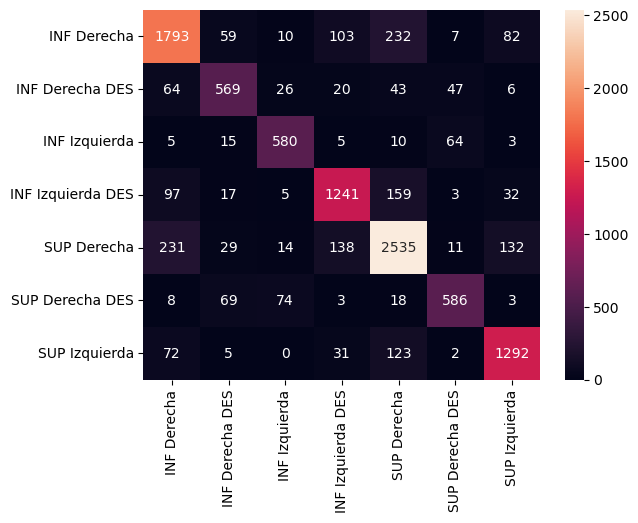

In [47]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test1, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 2 <font color='#EE8983 '>Aprendizaje Bayesiano</font>

El aprendizaje bayesiano es un enfoque de aprendizaje automático que utiliza la teoría de la probabilidad bayesiana para hacer inferencias sobre los datos. La teoría de la probabilidad bayesiana se basa en la idea de que la probabilidad de un evento depende de la información previa que se tiene sobre ese evento.

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


clf2 = GaussianNB()
clf2 = clf2.fit(x_train1, y_train1)
y_pred = clf2.predict(x_test1)
print("Gaussian Naive Bayes score: {:.3f}".format(accuracy_score(y_test1, y_pred)))

Gaussian Naive Bayes score: 0.200


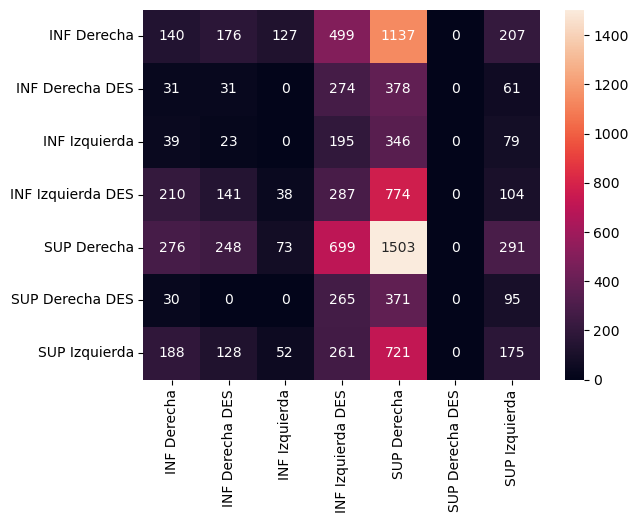

In [44]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test1, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 3  <font color='#8B68D6 '>Aprendizaje basado en instancias </font>

El aprendizaje basado en instancias es un enfoque de aprendizaje automático en el que el modelo se construye a partir de un conjunto de datos de entrenamiento que contiene ejemplos de datos etiquetados. El modelo aprende a clasificar nuevas observaciones comparando las características de la observación con las características de las observaciones de entrenamiento.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf3 = KNeighborsClassifier(40)
clf3 = clf3.fit(x_train1, y_train1)
y_pred = clf3.predict(x_test1)
print("K-Nearest Neighbors score: {:.3f}".format(accuracy_score(y_test1, y_pred)))

K-Nearest Neighbors score: 0.770


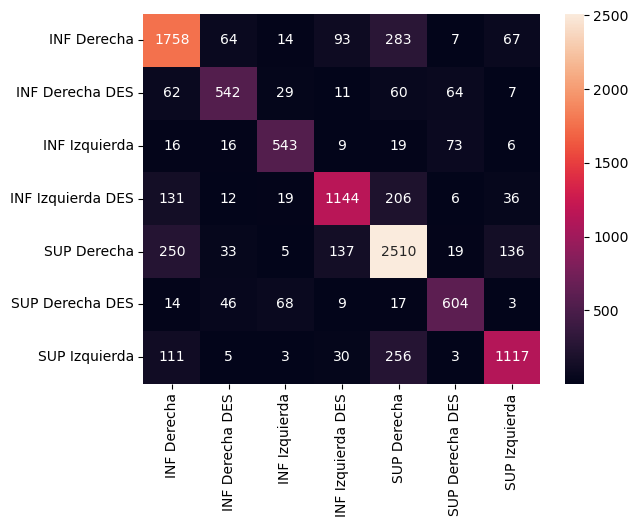

In [49]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test1, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 4 <font color='#4E7FCB '>Redes neuronales</font>

El proceso de aprendizaje de las redes neuronales se llama entrenamiento. El entrenamiento se lleva a cabo utilizando un algoritmo de aprendizaje automático. Los algoritmos de aprendizaje automático se utilizan para ajustar los pesos y los sesgos de los nodos de la red neuronal. Los pesos y los sesgos controlan cómo se procesan las entradas en la red neuronal.

In [50]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier() #alpha=1, max_iter=1000, random_state=80
clf5 = clf5.fit(x_train1, y_train1)
y_pred = clf5.predict(x_test1)
print("Neural Network score: {:.3f}".format(accuracy_score(y_test1, y_pred)))

Neural Network score: 0.159


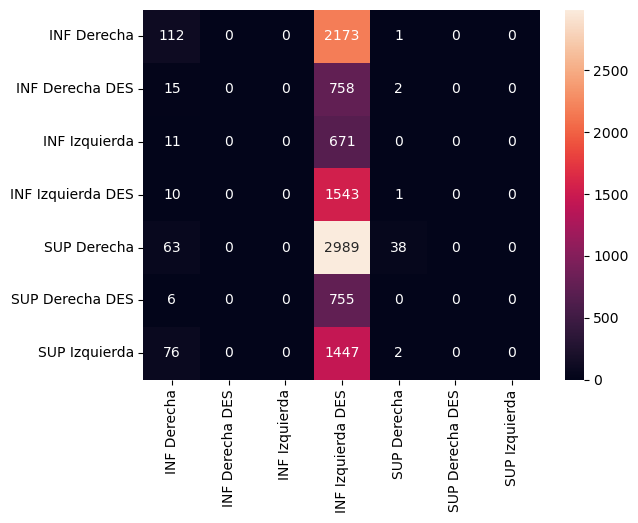

In [51]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test1, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 5 <font color='#DF5B91 '>AdaBoost</font>
AdaBoost funciona entrenando un conjunto de clasificadores débiles, cada uno de los cuales se enfoca en las observaciones que fueron mal clasificadas por los clasificadores anteriores. Los pesos de las observaciones se actualizan después de cada iteración para que los clasificadores futuros se centren en las observaciones que son más difíciles de clasificar.

In [52]:
from sklearn.ensemble import AdaBoostClassifier

clf6 = AdaBoostClassifier(algorithm='SAMME', random_state=42)
clf6 = clf6.fit(x_train1, y_train1)
y_pred = clf6.predict(x_test1)
print("AdaBoost score: {:.3f}".format(accuracy_score(y_test1, y_pred)))

AdaBoost score: 0.293


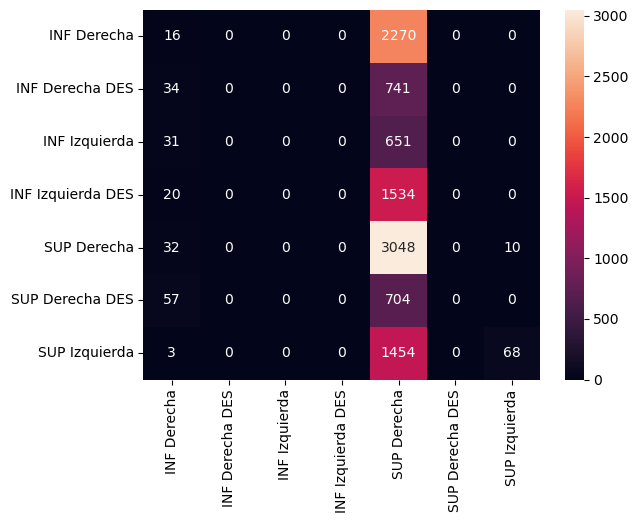

In [53]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test1, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 6 <font color='#5B6FDF '>Random Forest</font>


Random Forest es un algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Random Forest es un conjunto de árboles de decisión aleatorios.
Random Forest funciona construyendo un conjunto de árboles de decisión aleatorios. Cada árbol de decisión se construye sobre un subconjunto aleatorio de los datos de entrenamiento. Las observaciones que se utilizan para construir un árbol de decisión son seleccionadas al azar sin reemplazo.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


clf7 = RandomForestClassifier()
clf7 = clf7.fit(x_train1, y_train1)
y_pred = clf7.predict(x_test1)
print("Random Forest score: {:.3f}".format(accuracy_score(y_test1, y_pred)))

Random Forest score: 0.861


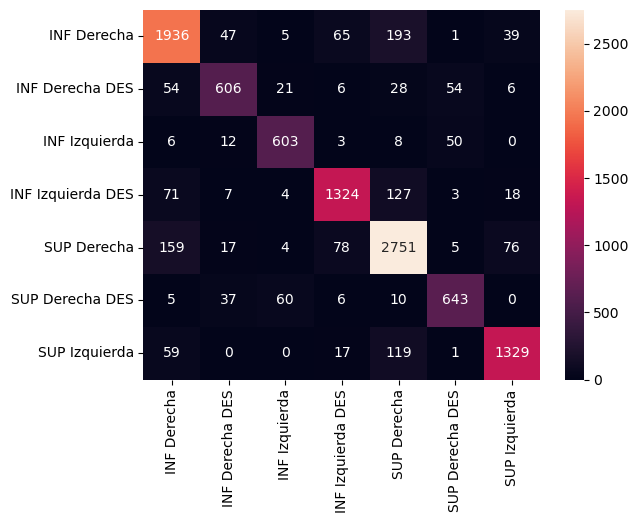

In [55]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test1, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 7 <font color='#5B6FDF '>QDA</font>

QDA, o Quadratic Discriminant Analysis, es un algoritmo de clasificación supervisado que se utiliza para clasificar las observaciones en diferentes categorías. QDA es un modelo probabilístico que se basa en la teoría de la probabilidad bayesiana.
QDA es un algoritmo robusto que es menos propenso al sobreajuste que otros algoritmos de clasificación. QDA también puede manejar datos complejos o no lineales.

In [56]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf8 = QuadraticDiscriminantAnalysis()
clf8 = clf8.fit(x_train1, y_train1)
y_pred = clf8.predict(x_test1)
print("QDA score: {:.3f}".format(accuracy_score(y_test1, y_pred)))

QDA score: 0.324


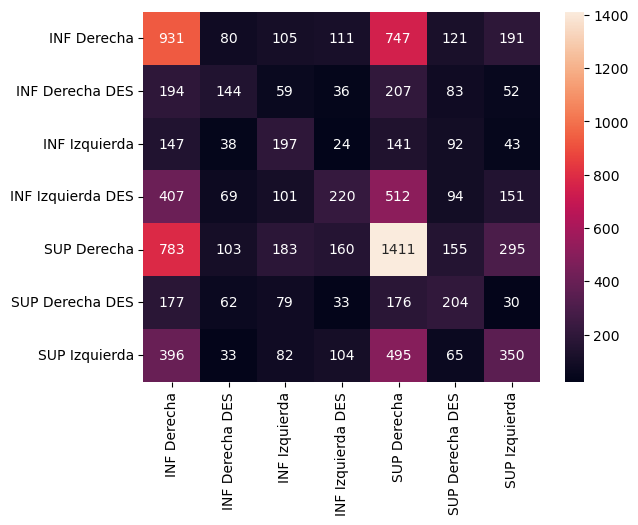

In [57]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test1, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 8 <font color='red'>Gradient boosting </font>



In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Configurando el clasificador Gradient Boosting
clf_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
clf_gbm.fit(x_train1, y_train1)
y_pred_gbm = clf_gbm.predict(x_test1)

print("Gradient Boosting score: {:.3f}".format(accuracy_score(y_test1, y_pred_gbm)))


Gradient Boosting score: 0.429


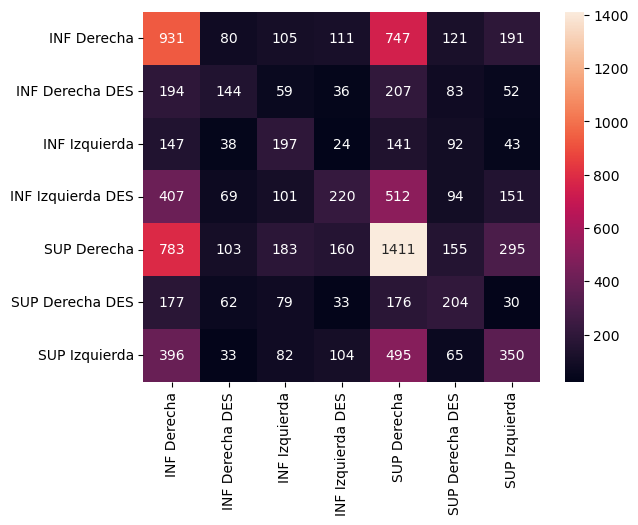

In [59]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test1, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

## 4.2  <font color='#5AABF '>Resultados Clasificadores con estímulo</font>



Los mejores resultados obtenidos mediante el uso de clasificadores fueron


|Clasificador| Accuracy|
|------------|---------|
|Random Forest|0.861|
|Árboles de decisión| 0.805|
|KNN | 0.770|

## 4.3 <font color='#413BEE'> Entrenamiento y prueba  para sujetos sin estímulo auditivo</font>

In [60]:
# Importa la biblioteca
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

In [61]:
from sklearn.model_selection import train_test_split

Aquí separamos del total de nuestros datos. Al conjunto de entrenamiento se le asigna el 75% de las muestras, mientras que para el conjunto de prueba se destina el 25% del total de las muestras

In [62]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0, shuffle=True)
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape

((27543, 24), (27543,), (9182, 24), (9182,))

### 1 <font color='green'>Árboles de Decisión</font>  


Los árboles de decisión son un tipo de algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Los árboles de decisión construyen un modelo de predicción a partir de un conjunto de datos de entrenamiento. El modelo se compone de un conjunto de reglas que se pueden utilizar para predecir el valor de una variable objetivo para una nueva observación.

In [63]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train2,y_train2)
y_pred = clf1.predict(x_test2)

print("Decision tree score: {:.3f}".format(clf1.score(x_test2, y_test2)))

Decision tree score: 0.798


Creamos la matriz de confusión 

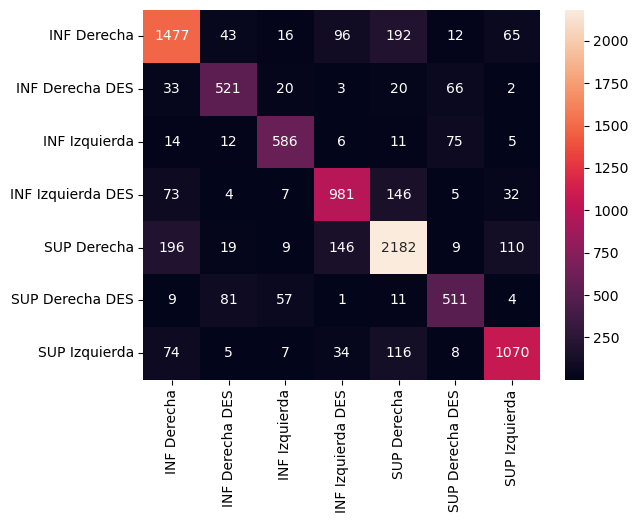

In [64]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test2, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 2 <font color='#EE8983 '>Aprendizaje Bayesiano</font>

El aprendizaje bayesiano es un enfoque de aprendizaje automático que utiliza la teoría de la probabilidad bayesiana para hacer inferencias sobre los datos. La teoría de la probabilidad bayesiana se basa en la idea de que la probabilidad de un evento depende de la información previa que se tiene sobre ese evento.

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


clf2 = GaussianNB()
clf2 = clf2.fit(x_train2, y_train2)
y_pred = clf2.predict(x_test2)
print("Gaussian Naive Bayes score: {:.3f}".format(accuracy_score(y_test2, y_pred)))

Gaussian Naive Bayes score: 0.198


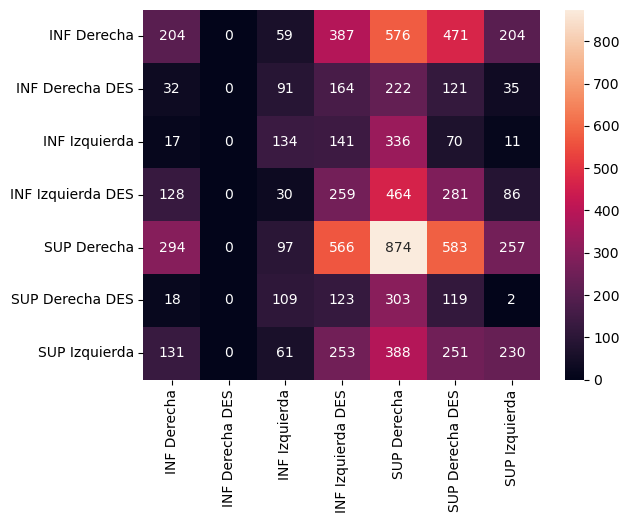

In [67]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test2, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 3  <font color='#8B68D6 '>Aprendizaje basado en instancias </font>

El aprendizaje basado en instancias es un enfoque de aprendizaje automático en el que el modelo se construye a partir de un conjunto de datos de entrenamiento que contiene ejemplos de datos etiquetados. El modelo aprende a clasificar nuevas observaciones comparando las características de la observación con las características de las observaciones de entrenamiento.

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf3 = KNeighborsClassifier(40)
clf3 = clf3.fit(x_train2, y_train2)
y_pred = clf3.predict(x_test2)
print("K-Nearest Neighbors score: {:.3f}".format(accuracy_score(y_test2, y_pred)))

K-Nearest Neighbors score: 0.787


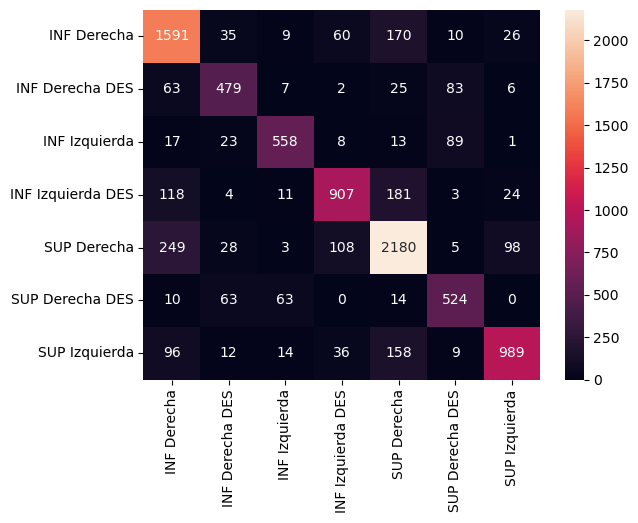

In [69]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test2, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 4 <font color='#4E7FCB '>Redes neuronales</font>

El proceso de aprendizaje de las redes neuronales se llama entrenamiento. El entrenamiento se lleva a cabo utilizando un algoritmo de aprendizaje automático. Los algoritmos de aprendizaje automático se utilizan para ajustar los pesos y los sesgos de los nodos de la red neuronal. Los pesos y los sesgos controlan cómo se procesan las entradas en la red neuronal.

In [70]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier(alpha=1, max_iter=1000, random_state=80)
clf5 = clf5.fit(x_train2, y_train2)
y_pred = clf5.predict(x_test2)
print("Neural Network score: {:.3f}".format(accuracy_score(y_test2, y_pred)))

Neural Network score: 0.291


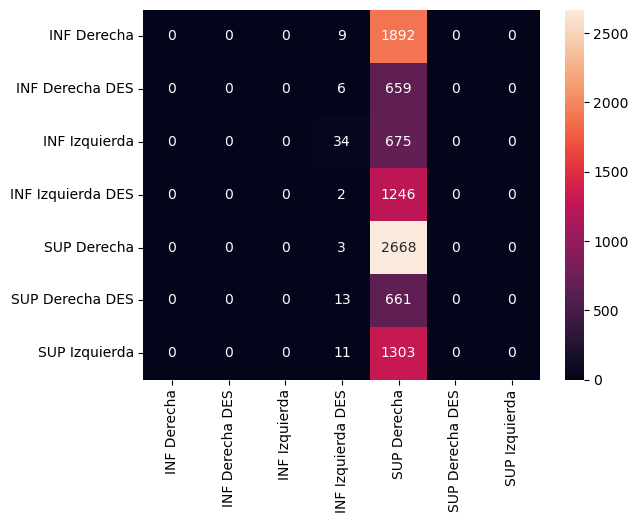

In [71]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test2, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 5 <font color='#DF5B91 '>AdaBoost</font>
AdaBoost funciona entrenando un conjunto de clasificadores débiles, cada uno de los cuales se enfoca en las observaciones que fueron mal clasificadas por los clasificadores anteriores. Los pesos de las observaciones se actualizan después de cada iteración para que los clasificadores futuros se centren en las observaciones que son más difíciles de clasificar.

In [72]:
from sklearn.ensemble import AdaBoostClassifier

clf6 = AdaBoostClassifier(algorithm='SAMME', random_state=42)
clf6 = clf6.fit(x_train2, y_train2)
y_pred = clf6.predict(x_test2)
print("AdaBoost score: {:.3f}".format(accuracy_score(y_test2, y_pred)))

AdaBoost score: 0.312


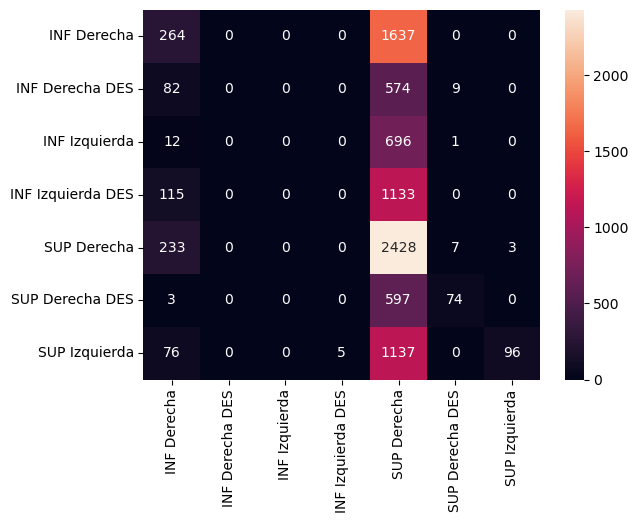

In [73]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test2, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 6 <font color='#5B6FDF '>Random Forest</font>


Random Forest es un algoritmo de aprendizaje automático supervisado que se utiliza para la clasificación y la regresión. Random Forest es un conjunto de árboles de decisión aleatorios.
Random Forest funciona construyendo un conjunto de árboles de decisión aleatorios. Cada árbol de decisión se construye sobre un subconjunto aleatorio de los datos de entrenamiento. Las observaciones que se utilizan para construir un árbol de decisión son seleccionadas al azar sin reemplazo.

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


clf7 = RandomForestClassifier()
clf7 = clf7.fit(x_train2, y_train2)
y_pred = clf7.predict(x_test2)
print("Random Forest score: {:.3f}".format(accuracy_score(y_test2, y_pred)))

Random Forest score: 0.858


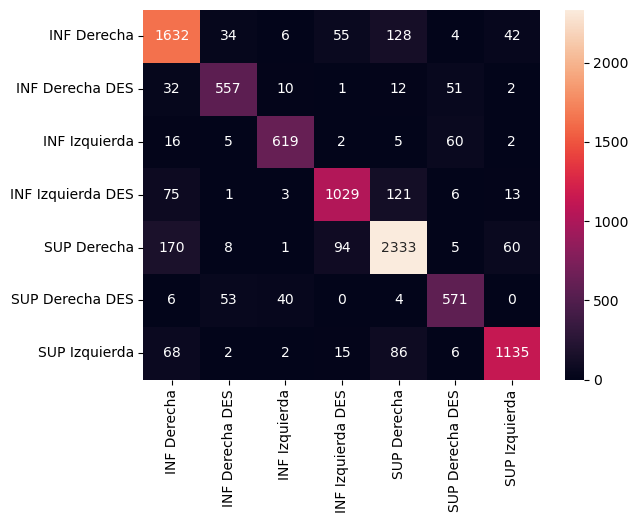

In [75]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test2, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 7 <font color='#5B6FDF '>QDA</font>

QDA, o Quadratic Discriminant Analysis, es un algoritmo de clasificación supervisado que se utiliza para clasificar las observaciones en diferentes categorías. QDA es un modelo probabilístico que se basa en la teoría de la probabilidad bayesiana.
QDA es un algoritmo robusto que es menos propenso al sobreajuste que otros algoritmos de clasificación. QDA también puede manejar datos complejos o no lineales.

In [76]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf8 = QuadraticDiscriminantAnalysis()
clf8 = clf8.fit(x_train2, y_train2)
y_pred = clf8.predict(x_test2)
print("QDA score: {:.3f}".format(accuracy_score(y_test2, y_pred)))

QDA score: 0.342


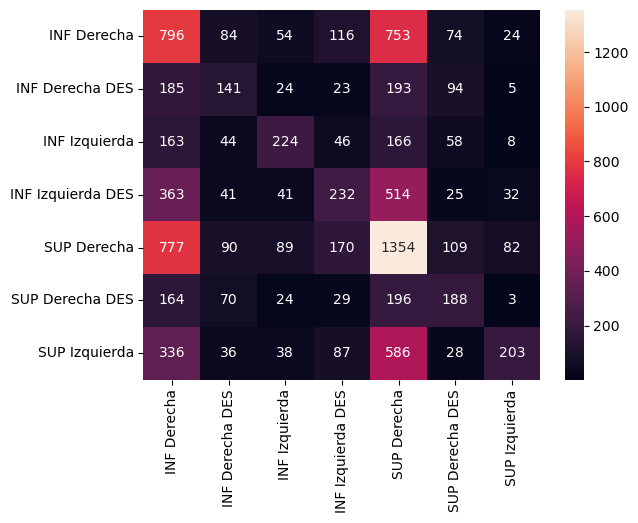

In [77]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test2, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

### 8 <font color='red'>Gradient boosting </font>



In [78]:
from sklearn.ensemble import GradientBoostingClassifier

# Configurando el clasificador Gradient Boosting
clf_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
clf_gbm.fit(x_train2, y_train2)
y_pred_gbm = clf_gbm.predict(x_test2)

print("Gradient Boosting score: {:.3f}".format(accuracy_score(y_test2, y_pred_gbm)))


Gradient Boosting score: 0.574


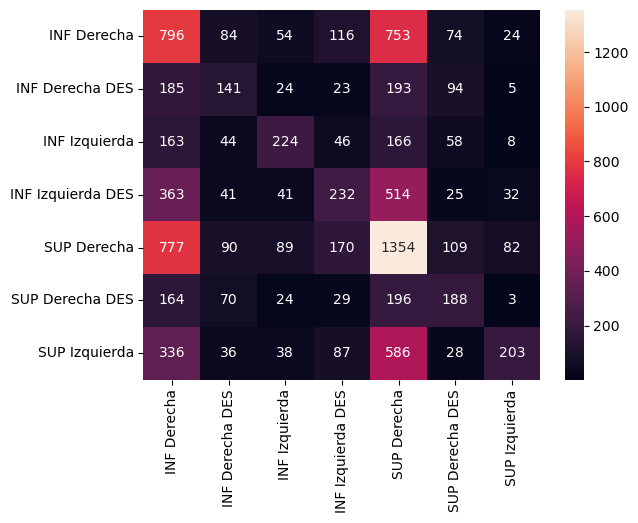

In [79]:
#Crea la matriz de confusión
cm = confusion_matrix(y_test2, y_pred)

# Visualiza la matriz de confusión con nombres de las clases
sns.heatmap(cm, annot=True, xticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], yticklabels=["INF Derecha", "INF Derecha DES",  "INF Izquierda",  "INF Izquierda DES", "SUP Derecha", "SUP Derecha DES",  "SUP Izquierda"], fmt='.0f');

##  4.4 <font color='#5AABF '>Resultados Clasificadores sin estímulo</font>



Los mejores resultados obtenidos mediante el uso de clasificadores fueron


|Clasificador| Accuracy|
|------------|---------|
|Random Forest|0.858|
|Árboles de decisión| 0.798|
|KNN | 0.787|

Observemos que los resultados obtenidos en sujetos sometidos a estímulo es superior al obtenido en sujetos sin estímulo, lo cual es opuesto a lo que se esperaba.

# 5 <font color='#413BEE'> Entrenamiento y prueba  para sujetos usando Stacking</font>

In [80]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

## 5.1 <font color='#413BEE'> Entrenamiento y prueba  para sujetos con estímulo auditivo usando Stacking </font>

In [81]:
# Definiendo los clasificadores base
base_clasificadores = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
]

# Definiendo el meta-clasificador
meta_clasificador = LogisticRegression(random_state=42)

# Creando el modelo de stacking
modelo_stacking = StackingClassifier(estimators=base_clasificadores, final_estimator=meta_clasificador, cv=5)

# Entrenando el modelo de stacking
modelo_stacking.fit(x_train1, y_train1)

# Haciendo predicciones con el conjunto de prueba
y_pred = modelo_stacking.predict(x_test1)

# Evaluando la precisión del modelo
precision = accuracy_score(y_test1, y_pred)
print(f'Precisión del modelo de stacking: {precision:.3f}')


Precisión del modelo de stacking: 0.851


## 5.2 <font color='#413BEE'> Entrenamiento y prueba  para sujetos sin estímulo auditivo usando Stacking</font>

In [82]:
# Definiendo los clasificadores base
base_clasificadores = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
]

# Definiendo el meta-clasificador
meta_clasificador = LogisticRegression(random_state=42)

# Creando el modelo de stacking
modelo_stacking = StackingClassifier(estimators=base_clasificadores, final_estimator=meta_clasificador, cv=5)

# Entrenando el modelo de stacking
modelo_stacking.fit(x_train2, y_train2)

# Haciendo predicciones con el conjunto de prueba
y_pred = modelo_stacking.predict(x_test2)

# Evaluando la precisión del modelo
precision = accuracy_score(y_test2, y_pred)
print(f'Precisión del modelo de stacking: {precision:.3f}')


Precisión del modelo de stacking: 0.848


## 5.3  <font color='#5AABF '>Resultados Stacking con y sin estímulo</font>



Los mejores resultados obtenidos mediante el uso de Stacking de los clasificadores:
-  RandomForest
-  GradientBoosting
-  Árboles de decisión 


|Clasificador| Accuracy|
|------------|---------|
|Con estímulo|0.851|
|Sin estímulo| 0.848|


## 5.4 <font color='#413BEE'> Entrenamiento y prueba  para sujetos con estímulo auditivo usando Stacking versión 2</font>

In [83]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [84]:
# Definiendo los clasificadores base
base_clasificadores = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),  # KNN con 5 vecinos
    ('dt', DecisionTreeClassifier(random_state=42)),
]

# Definiendo el meta-clasificador
meta_clasificador = LogisticRegression(random_state=42)

# Creando el modelo de stacking
modelo_stacking = StackingClassifier(estimators=base_clasificadores, final_estimator=meta_clasificador, cv=5)

# Entrenando el modelo de stacking
modelo_stacking.fit(x_train1, y_train1)

# Haciendo predicciones con el conjunto de prueba
y_pred = modelo_stacking.predict(x_test1)

# Evaluando la precisión del modelo
precision = accuracy_score(y_test1, y_pred)
print(f'Precisión del modelo de stacking: {precision:.3f}')


Precisión del modelo de stacking: 0.859


## 5.5 <font color='#413BEE'> Entrenamiento y prueba  para sujetos sin estímulo auditivo usando Stacking versión 2</font>

In [85]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [86]:
# Definiendo los clasificadores base
base_clasificadores = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),  # KNN con 5 vecinos
    ('dt', DecisionTreeClassifier(random_state=42)),
]

# Definiendo el meta-clasificador
meta_clasificador = LogisticRegression(random_state=42)

# Creando el modelo de stacking
modelo_stacking = StackingClassifier(estimators=base_clasificadores, final_estimator=meta_clasificador, cv=5)

# Entrenando el modelo de stacking
modelo_stacking.fit(x_train2, y_train2)

# Haciendo predicciones con el conjunto de prueba
y_pred = modelo_stacking.predict(x_test2)

# Evaluando la precisión del modelo
precision = accuracy_score(y_test2, y_pred)
print(f'Precisión del modelo de stacking: {precision:.3f}')


Precisión del modelo de stacking: 0.854


## 5.6  <font color='#5AABF '>Resultados Stacking versión 2 con y sin estímulo</font>



Los mejores resultados obtenidos mediante el uso de Stacking de los clasificadores:
-  RandomForest
-  KNeighbors
-  Árboles de decisión 


|Clasificador| Accuracy|
|------------|---------|
|Con estímulo|0.859|
|Sin estímulo| 0.854|


#  6 <font color='#413BEE'> Reducción de dimensionalidad </font> 

##  6.1  <font color='#413BEE'>Reducción de dimensionalidad con estímulo auditivo</font> 

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA

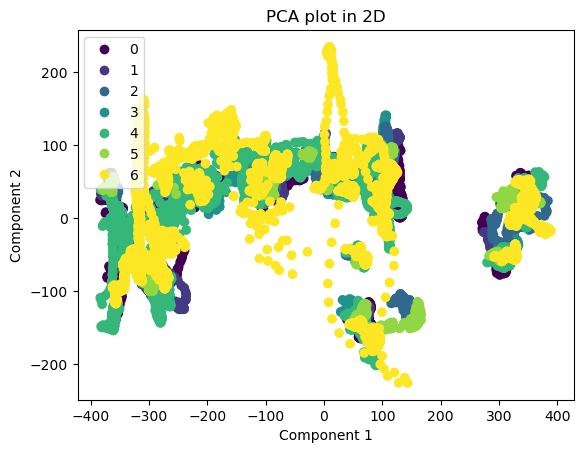

In [33]:
X_PCA = PCA(n_components=2).fit_transform(X1)

scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y1)
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()


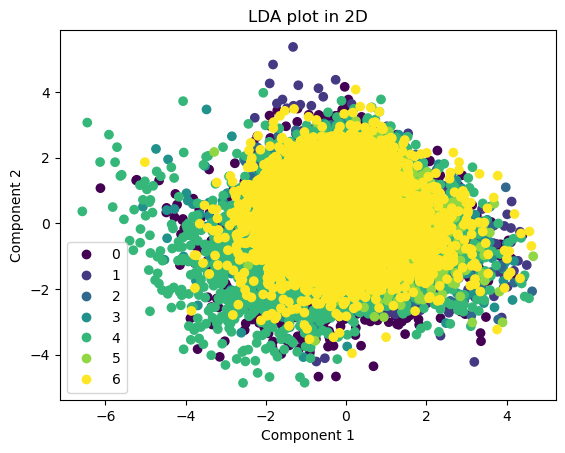

In [35]:
X_LDA = LDA(n_components=2).fit_transform(X1,y1)

scatter = plt.scatter(X_LDA[:,0], X_LDA[:,1], c=y1)
plt.title('LDA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

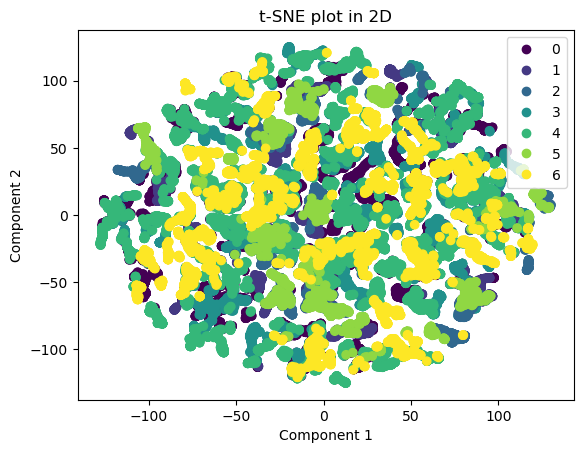

In [37]:
X_TSNE = TSNE().fit_transform(X1)

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y1)
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

##  6.2 <font color='#413BEE'>Reducción de dimensionalidad sin estímulo auditivo</font> 

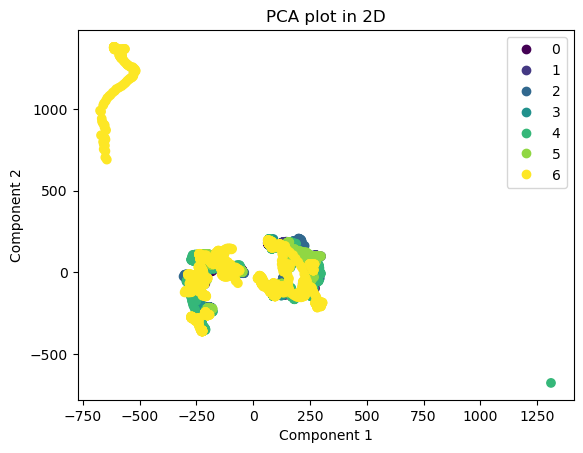

In [34]:
X_PCA = PCA(n_components=2).fit_transform(X2)

scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y2)
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()


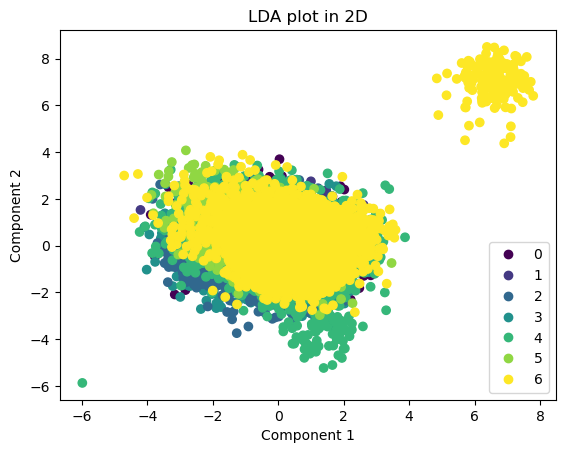

In [36]:
X_LDA = LDA(n_components=2).fit_transform(X2,y2)

scatter = plt.scatter(X_LDA[:,0], X_LDA[:,1], c=y2)
plt.title('LDA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

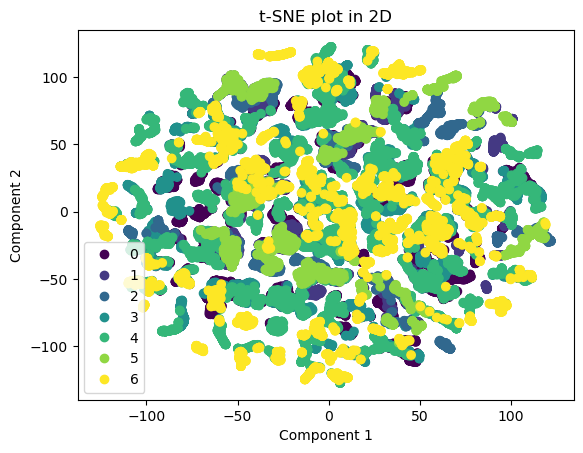

In [38]:
X_TSNE = TSNE().fit_transform(X2)

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y2)
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()